<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.699281,37.477453,57.726173,88.022999,-0.000587,224.925320,224.925723,-0.000404
1,0.0,1.0,42.685039,25.207478,31.861910,73.523337,-0.007033,183.270731,183.277498,-0.006768
2,0.0,2.0,26.070610,55.365238,56.026775,85.871461,0.000029,233.334113,233.333936,0.000177
3,0.0,3.0,79.805196,24.746661,86.514134,46.122687,0.000600,247.189277,247.188686,0.000591
4,0.0,4.0,51.985097,51.823467,76.983856,75.296257,-0.000700,266.087977,266.088599,-0.000622
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.452924,36.497364,50.255473,22.701842,-0.001256,152.906346,152.907584,-0.001237
249996,999.0,246.0,84.605381,35.376836,81.454153,88.269663,0.000393,299.706426,299.706063,0.000362
249997,999.0,247.0,44.479775,78.727442,43.765759,97.425959,0.000115,274.399050,274.398833,0.000217
249998,999.0,248.0,47.070926,66.851132,56.617370,68.972569,0.000195,249.512193,249.511981,0.000212


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.699281,37.477453,57.726173,88.022999,-0.000587,224.925320,224.925723,-0.000404
1,0.0,1.0,42.685039,25.207478,31.861910,73.523337,-0.007033,183.270731,183.277498,-0.006768
2,0.0,2.0,26.070610,55.365238,56.026775,85.871461,0.000029,233.334113,233.333936,0.000177
3,0.0,3.0,79.805196,24.746661,86.514134,46.122687,0.000600,247.189277,247.188686,0.000591
4,0.0,4.0,51.985097,51.823467,76.983856,75.296257,-0.000700,266.087977,266.088599,-0.000622
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.452924,36.497364,50.255473,22.701842,-0.001256,152.906346,152.907584,-0.001237
249996,999.0,246.0,84.605381,35.376836,81.454153,88.269663,0.000393,299.706426,299.706063,0.000362
249997,999.0,247.0,44.479775,78.727442,43.765759,97.425959,0.000115,274.399050,274.398833,0.000217
249998,999.0,248.0,47.070926,66.851132,56.617370,68.972569,0.000195,249.512193,249.511981,0.000212


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.699281  37.477453  57.726173  88.022999 -0.000587  224.925320   
      1.0    42.685039  25.207478  31.861910  73.523337 -0.007033  183.270731   
      2.0    26.070610  55.365238  56.026775  85.871461  0.000029  233.334113   
      3.0    79.805196  24.746661  86.514134  46.122687  0.000600  247.189277   
      4.0    51.985097  51.823467  76.983856  75.296257 -0.000700  266.087977   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  33.452924  36.497364  50.255473  22.701842 -0.001256  152.906346   
      246.0  84.605381  35.376836  81.454153  88.269663  0.000393  299.706426   
      247.0  44.479775  78.727442  43.765759  97.425959  0.000115  274.399050   
      248.0  47.070926  66.851132  56.617370  68.972569  0.000195  249.512193   
      249.0  43.634995  77.538704  79.457061  72.533971 -0.000140  283.164591   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.925723 -0.000404  
      1.0    183.277498 -0.006768  
      2.0    233.333936  0.000177  
      3.0    247.188686  0.000591  
      4.0    266.088599 -0.000622  
...                 ...       ...  
999.0 245.0  152.907584 -0.001237  
      246.0  299.706063  0.000362  
      247.0  274.398833  0.000217  
      248.0  249.511981  0.000212  
      249.0  283.164823 -0.000232  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.699281  37.477453  57.726173  88.022999 -0.000587  224.925320   
      1.0    42.685039  25.207478  31.861910  73.523337 -0.007033  183.270731   
      2.0    26.070610  55.365238  56.026775  85.871461  0.000029  233.334113   
      3.0    79.805196  24.746661  86.514134  46.122687  0.000600  247.189277   
      4.0    51.985097  51.823467  76.983856  75.296257 -0.000700  266.087977   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  33.452924  36.497364  50.255473  22.701842 -0.001256  152.906346   
      246.0  84.605381  35.376836  81.454153  88.269663  0.000393  299.706426   
      247.0  44.479775  78.727442  43.765759  97.425959  0.000115  274.399050   
      248.0  47.070926  66.851132  56.617370  68.972569  0.000195  249.512193   
      249.0  43.634995  77.538704  79.457061  72.533971 -0.000140  283.164591   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.925723 -0.000404  
      1.0    183.277498 -0.006768  
      2.0    233.333936  0.000177  
      3.0    247.188686  0.000591  
      4.0    266.088599 -0.000622  
...                 ...       ...  
999.0 245.0  152.907584 -0.001237  
      246.0  299.706063  0.000362  
      247.0  274.398833  0.000217  
      248.0  249.511981  0.000212  
      249.0  283.164823 -0.000232  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.699281,37.477453,57.726173,88.022999,-0.000587,224.925320,224.925723,-0.000404
1,0.0,1.0,42.685039,25.207478,31.861910,73.523337,-0.007033,183.270731,183.277498,-0.006768
2,0.0,2.0,26.070610,55.365238,56.026775,85.871461,0.000029,233.334113,233.333936,0.000177
3,0.0,3.0,79.805196,24.746661,86.514134,46.122687,0.000600,247.189277,247.188686,0.000591
4,0.0,4.0,51.985097,51.823467,76.983856,75.296257,-0.000700,266.087977,266.088599,-0.000622
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.452924,36.497364,50.255473,22.701842,-0.001256,152.906346,152.907584,-0.001237
249996,999.0,246.0,84.605381,35.376836,81.454153,88.269663,0.000393,299.706426,299.706063,0.000362
249997,999.0,247.0,44.479775,78.727442,43.765759,97.425959,0.000115,274.399050,274.398833,0.000217
249998,999.0,248.0,47.070926,66.851132,56.617370,68.972569,0.000195,249.512193,249.511981,0.000212


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.699281  37.477453  57.726173  88.022999 -0.000587  224.925320   
      1.0    42.685039  25.207478  31.861910  73.523337 -0.007033  183.270731   
      2.0    26.070610  55.365238  56.026775  85.871461  0.000029  233.334113   
      3.0    79.805196  24.746661  86.514134  46.122687  0.000600  247.189277   
      4.0    51.985097  51.823467  76.983856  75.296257 -0.000700  266.087977   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  33.452924  36.497364  50.255473  22.701842 -0.001256  152.906346   
      246.0  84.605381  35.376836  81.454153  88.269663  0.000393  299.706426   
      247.0  44.479775  78.727442  43.765759  97.425959  0.000115  274.399050   
      248.0  47.070926  66.851132  56.617370  68.972569  0.000195  249.512193   
      249.0  43.634995  77.538704  79.457061  72.533971 -0.000140  283.164591   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    224.925723 -0.000404  
      1.0    183.277498 -0.006768  
      2.0    233.333936  0.000177  
      3.0    247.188686  0.000591  
      4.0    266.088599 -0.000622  
...                 ...       ...  
999.0 245.0  152.907584 -0.001237  
      246.0  299.706063  0.000362  
      247.0  274.398833  0.000217  
      248.0  249.511981  0.000212  
      249.0  283.164823 -0.000232  

[250000 rows x 8 columns]

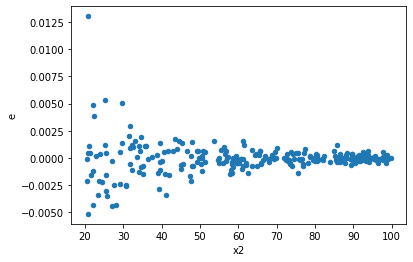

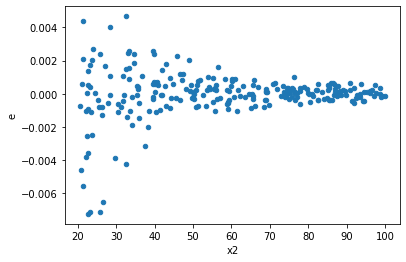

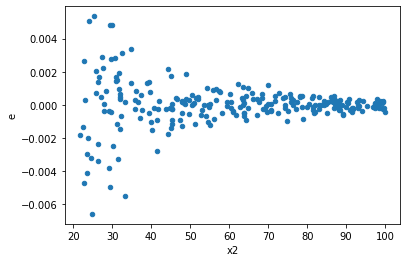

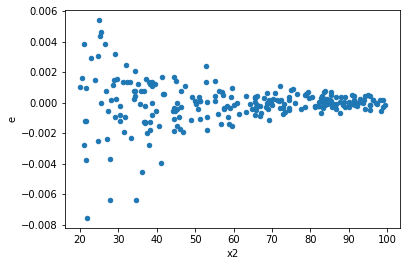

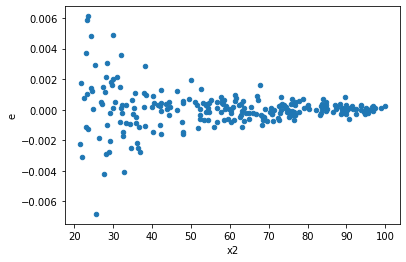

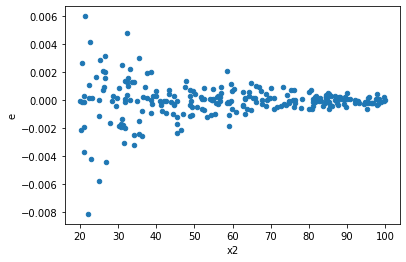

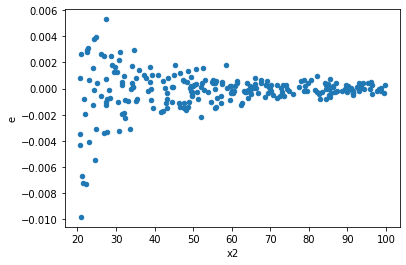

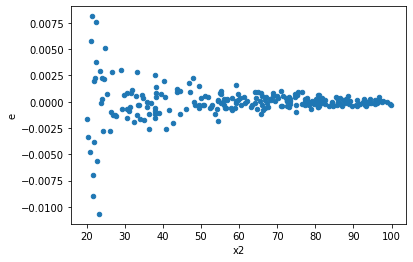

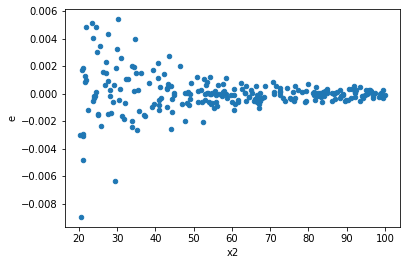

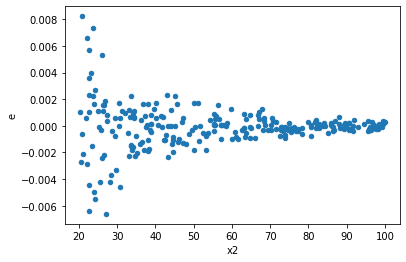

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
122.0,96.0,96.0,0.00014490480162492183,0.00019531234837950838,1.509425016926269e-06,2.034503628953212e-06,1.3478666420251808,0.14540163288152153,0.9272991835592392,0.07270081644076076,Reject005=1 : Homoscedasticity
146.0,96.0,96.0,0.0001378728769612559,0.00016983922386559772,1.436175801679749e-06,1.7691585819333095e-06,1.2318537743527669,0.3086964917576198,0.8456517541211901,0.1543482458788099,Reject005=1 : Homoscedasticity
194.0,96.0,96.0,0.00010760768681415396,0.00015359441391732002,1.1209134043141038e-06,1.5999418116387502e-06,1.4273554098657315,0.08290102994850557,0.9585494850257472,0.04145051497425278,Reject005=1 : Homoscedasticity
907.0,96.0,96.0,0.00023258138673231202,0.00026338299781519884,2.4227227784615833e-06,2.7435728939083214e-06,1.1324336891943023,0.543518096568286,0.728240951715857,0.271759048284143,Reject005=1 : Homoscedasticity
936.0,96.0,96.0,0.00011081608281209925,0.00012898039763444143,1.1543341959593673e-06,1.3435458086920982e-06,1.16391406699641,0.45849924742382475,0.7707503762880876,0.22924962371191238,Reject005=1 : Homoscedasticity
984.0,96.0,96.0,0.00017964560839582694,0.00019723465238276203,1.871308420789864e-06,2.0545276289871045e-06,1.0979096797522587,0.6481516443690254,0.6759241778154873,0.3240758221845127,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.00027163016729590226,4.319990290975352e-05,2.829480909332315e-06,4.4999898864326585e-07,0.15903941502452268,2.902526589829374e-17,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,0.0003338839217470388,0.00016317393717425247,3.477957518198321e-06,1.6997285122317966e-06,0.4887145697835617,0.0005357666354280144,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,0.00022633336503423095,0.0001855125059206424,2.3576392191065726e-06,1.9324219366733584e-06,0.8196427685002838,0.3315429045331351,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,0.00024291338746481326,8.083255593534683e-05,2.530347786091805e-06,8.420057909931962e-07,0.3327628698399987,1.523492667344369e-07,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,0.0002888706426848421,5.303822462357581e-05,3.0090691946337716e-06,5.524815064955813e-07,0.183605450974956,4.015537201616585e-15,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,0.00033190541485948283,4.5402373007067355e-05,3.457348071452946e-06,4.7294138549028495e-07,0.13679310723595497,1.2899940280906182e-19,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,0.00020014703438618782,6.326824637303798e-05,2.08486494152279e-06,6.59044233052479e-07,0.3161088375207229,4.1854273757186194e-08,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,0.00026070849035683257,5.680844354370063e-05,2.715713441217006e-06,5.917546202468815e-07,0.21790024354767548,1.0290665019024504e-12,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,0.00026985540930069273,8.657502127873889e-05,2.810993846882216e-06,9.018231383201968e-07,0.32082003285793187,6.101005747687123e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    970
Reject005=1 : Homoscedasticity       30
Name: Result_test, dtype: int64